In [ ]:
# Mount Google Drive to access dataset
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import nltk

In [ ]:
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer

from gensim.models import word2vec
from gensim.models import Word2Vec

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity

In [ ]:
def pprocess(text):
    # Load the NLTK stop words
    stop_words = set(stopwords.words('english'))
    # Initialize the NLTK stemmer
    stemmer = PorterStemmer()
    tokens = word_tokenize(text)

    # Lowercase the tokens
    tokens = [token.lower() for token in tokens]

    # Remove punctuation and special characters
    tokens = [token for token in tokens if token.isalpha()]

    # Remove stop words
    tokens = [token for token in tokens if token not in stop_words]

    # Stem the tokens
    tokens = [stemmer.stem(token) for token in tokens]
    
    return tokens

In [ ]:
def preprocess(text):
    ret = []
    # Load the NLTK stop words
    stop_words = set(stopwords.words('english'))
    # Initialize the NLTK stemmer
    stemmer = PorterStemmer()

    for tex in text:
        # Tokenize the sentence
        tokens = word_tokenize(tex)

        # Lowercase the tokens
        tokens = [token.lower() for token in tokens]

        # Remove punctuation and special characters
        tokens = [token for token in tokens if token.isalpha()]

        # Remove stop words
        tokens = [token for token in tokens if token not in stop_words]

        # Stem the tokens
        tokens = [stemmer.stem(token) for token in tokens]
        ret.append(tokens)

    return ret

In [ ]:
# Load the dataset into a DataFrame
df_0 = pd.read_csv('/content/drive/MyDrive/bick/train00.csv')
df_1 = pd.read_csv('/content/drive/MyDrive/bick/train01.csv')
df_2 = pd.read_csv('/content/drive/MyDrive/bick/train02.csv')
df_3 = pd.read_csv('/content/drive/MyDrive/bick/train03.csv')

In [ ]:
train_df0 = df_0['Review Text'].to_frame()
train_df0.columns = ['text']

train_df1 = df_1['Review'].to_frame()
train_df1.columns = ['text']

train_df2 = df_2['Review'].to_frame()
train_df2.columns = ['text']

train_df3 = df_3['review_text'].to_frame()
train_df3.columns = ['text']

train_df = pd.concat([train_df0, train_df1, train_df2, train_df3], ignore_index=True)
#train_df['corpus'] = ''

In [ ]:
train_df

,text
0,Absolutely wonderful - silky and sexy and comf...
1,Love this dress! it's sooo pretty. i happene...
2,I had such high hopes for this dress and reall...
3,"I love, love, love this jumpsuit. it's fun, fl..."
4,This shirt is very flattering to all due to th...
...,...
70453,I oot this dress in the blue. it fits great--h...
70454,I was very patient with this dress. i was wait...
70455,"The deep v doesn't gape, and flatters the neck..."
70456,"I saw this dress online this morning, went int..."


In [ ]:
train_df['text'].isna().sum()

2535

In [ ]:
train_df = train_df.dropna(axis=0)
train_df = train_df.drop_duplicates(['text'], keep='first')
train_df = train_df.reset_index(drop=True)

In [ ]:
train_df['corpus'] = train_df['text'].apply(pprocess)

In [ ]:
train_df

,text,corpus
0,Absolutely wonderful - silky and sexy and comf...,"[absolut, wonder, silki, sexi, comfort]"
1,Love this dress! it's sooo pretty. i happene...,"[love, dress, sooo, pretti, happen, find, stor..."
2,I had such high hopes for this dress and reall...,"[high, hope, dress, realli, want, work, initi,..."
3,"I love, love, love this jumpsuit. it's fun, fl...","[love, love, love, jumpsuit, fun, flirti, fabu..."
4,This shirt is very flattering to all due to th...,"[shirt, flatter, due, adjust, front, tie, perf..."
...,...,...
67918,I oot this dress in the blue. it fits great--h...,"[oot, dress, blue, fit, great, hit, knee, shor..."
67919,I was very patient with this dress. i was wait...,"[patient, dress, wait, almost, forev, till, dr..."
67920,"The deep v doesn't gape, and flatters the neck...","[deep, v, gape, flatter, necklin, side, slit, ..."
67921,"I saw this dress online this morning, went int...","[saw, dress, onlin, morn, went, store, afterno..."


In [ ]:
corpus = train_df['corpus'].to_list()

In [ ]:
# Train a Word2Vec model on the preprocessed corpus
model = Word2Vec(corpus, min_count=1, vector_size=100)

In [ ]:
# Compute the similarity between the input sentence and each sentence in the text file
input_sentence = "As you put on the shirt, you suddenly realize that it feels like someone else's skin clinging uncomfortably to your body."
input_tokens = pprocess(input_sentence)
similar_sentences = []
for i in range(len(corpus)):
    if len(corpus[i]) == 0 or len(input_tokens) == 0:
        continue
    similarity = model.wv.n_similarity(input_tokens, corpus[i])
    similar_sentences.append((train_df.loc[i, 'text'], similarity))

# Sort the similar sentences by similarity score in descending order and output the top n sentences
n = 30
top_similar_sentences = sorted(similar_sentences, key=lambda x: x[1], reverse=True)[:n]
tmp = 1
for sentence, similarity in top_similar_sentences:
    print(f"\n{tmp}) sentence: \n\t", sentence, "\nsimilarity: ", similarity)
    tmp += 1


1) sentence: 
	 Lovely sweater. it fits baggy and form fitted somehow. i like the multi-fabric look. however, the main body of the sweater does shed!!! like, i just held it up to my body to look at it in the mirror and the shirt i had on was covered. haven't washed it yet, so can't speck to that, but i'm guessing it will lose some of that in the wash. 
similarity:  0.8110736

2) sentence: 
	 Nice fabric, magnificent color, would be lovely ... on someone with a straight-and-narrow body type. for ladies with curves, take a pass--too much like maternity wear, and not in that elegantly slouchy kind of way. the straight-up "is she or isn't she" kind of way. 
similarity:  0.8085651

3) sentence: 
	 Nice fabric, great color, would be lovely ... on someone with a straight-and-narrow body type. for ladies with curves, take a pass--too much like maternity wear, and not in that elegantly slouchy kind of way. the straight-up "is she or isn't she" kind of way. 
similarity:  0.8076213

4) sentence:

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


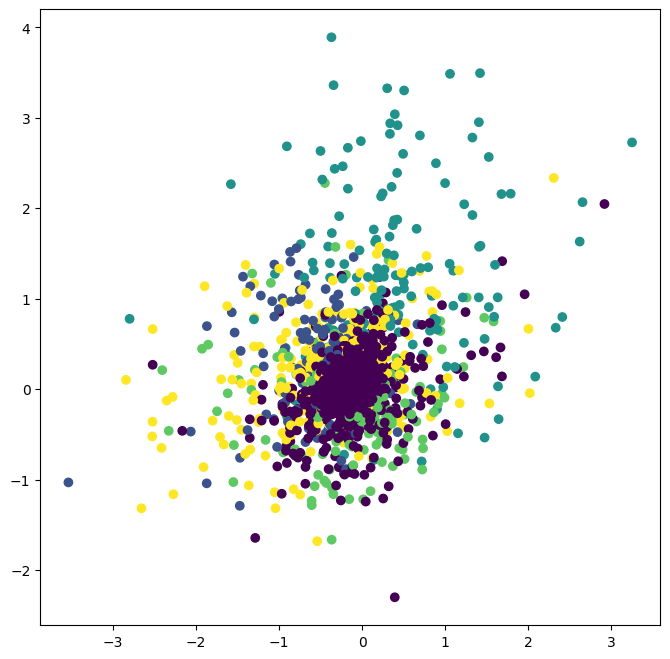

In [ ]:
import gensim
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Load trained word2vec model
# model = gensim.models.Word2Vec.load('path/to/trained/model')

# Get embedding matrix and list of words
embeddings = model.wv.vectors
words = model.wv.index_to_key

# Cluster embeddings using K-Means
kmeans = KMeans(n_clusters=5, random_state=42)
clusters = kmeans.fit_predict(embeddings)

# Plot the clusters using the first two dimensions of the embeddings
plt.figure(figsize=(8, 8))
plt.scatter(embeddings[:, 0], embeddings[:, 1], c=clusters, cmap='viridis')
plt.show()


In [ ]:
import gensim
import plotly.express as px
from sklearn.manifold import TSNE

# Load trained word2vec model
# model = gensim.models.Word2Vec.load('path/to/trained/model')

# Get embedding matrix and list of words
embeddings = model.wv.vectors
words = model.wv.index_to_key

# Use t-SNE to project embeddings into 2D space
tsne = TSNE(n_components=3, random_state=42)
embeddings_3d = tsne.fit_transform(embeddings)

# Create a dataframe with the 2D embeddings and their corresponding words
df = pd.DataFrame({'x': embeddings_3d[:, 0], 'y': embeddings_3d[:, 1], 'z': embeddings_3d[:, 2], 'word': words}) 

# Use Plotly to create a scatter plot of the embeddings
fig = px.scatter_3d(df, x='x', y='y', z='z', color=clusters, hover_data=['word'])
fig.show()

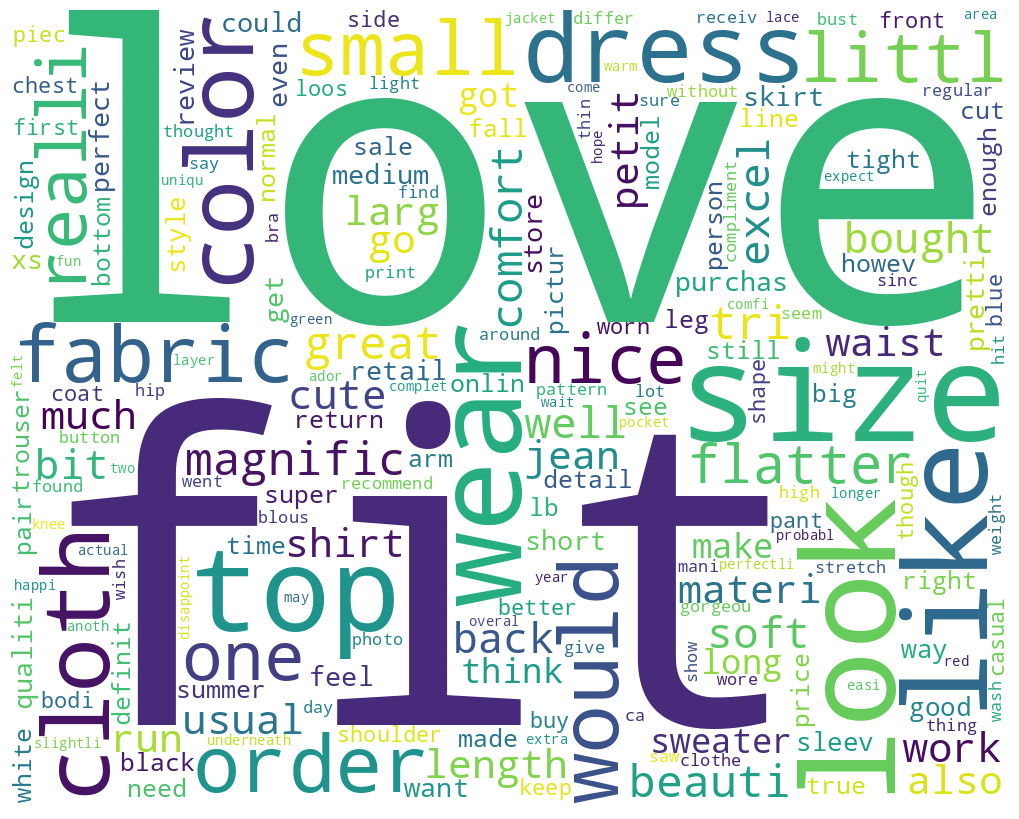

In [ ]:
# Get the top 100 most common words
top_words = model.wv.index_to_key[:500]

# Assign frequency values based on how often each word appears in the model

word_frequencies = {}
for word in top_words:
    word_frequencies[word] = model.wv.get_vecattr(word, "count")

from wordcloud import WordCloud

# Create the word cloud object
wordcloud = WordCloud(width=1000, height=800, background_color="white")

# Generate the word cloud
wordcloud.generate_from_frequencies(word_frequencies)

# Display the word cloud
import matplotlib.pyplot as plt
plt.figure(figsize=(10,8), facecolor=None)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()
